# Importing Important Libraries

In [700]:
import torch
from torch import nn
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

In [701]:
# make 1000 samples
n_samples = 1000

x, y = make_circles(n_samples,
                    noise = 0.03,
                    random_state=42
                    )

In [702]:
len(x), len(y)

(1000, 1000)

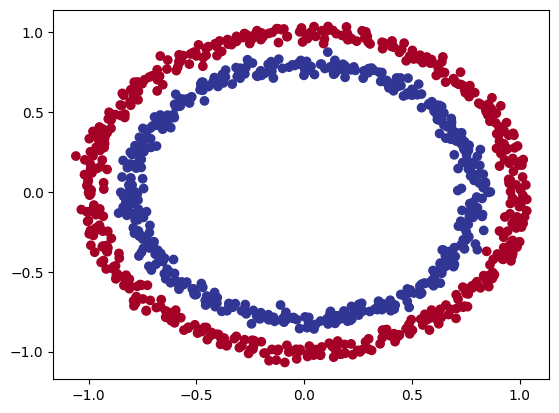

In [703]:
# visualize, visuzlize, visualize
plt.scatter(x=x[:,0], y=x[:,1], c=y, cmap="RdYlBu")
plt.show()

In [704]:
type(x)

numpy.ndarray

# Turning Data into Tensors

In [705]:
x = torch.from_numpy(x).type(torch.float)
y = torch.from_numpy(y).type(torch.float)

In [706]:
x[:5], y[:5], type(x), x.dtype

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]),
 torch.Tensor,
 torch.float32)

# Splitting the Data

In [707]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    train_size=0.8,
                                                    random_state=42)

In [708]:
x_train.shape, x_test.shape

(torch.Size([800, 2]), torch.Size([200, 2]))

In [709]:
x_train[:5], y_train[:5]

(tensor([[ 0.6579, -0.4651],
         [ 0.6319, -0.7347],
         [-1.0086, -0.1240],
         [-0.9666, -0.2256],
         [-0.1666,  0.7994]]),
 tensor([1., 0., 0., 0., 1.]))

# Device Agnostic Code

In [710]:
 device = "cuda" if torch.cuda.is_available() else "cpu"

In [711]:
device

'cuda'

# Create the model

In [712]:
class Circle_Model(nn.Module):
  def __init__(self):
    super().__init__()

    self.model_layers = nn.Sequential(
        nn.Linear(in_features=2, out_features=10),
        nn.ReLU(),
        nn.Linear(in_features=10, out_features=10),
        nn.ReLU(), # Non-Linear Activation Function (Relu(x) = max(0, x))
        nn.Linear(in_features=10, out_features=1)
    )

  def forward(self, x:torch.tensor) -> torch.tensor:
    return self.model_layers(x)

In [713]:
model_0 = Circle_Model().to(device)

In [714]:
model_0, next(model_0.parameters()).device

(Circle_Model(
   (model_layers): Sequential(
     (0): Linear(in_features=2, out_features=10, bias=True)
     (1): ReLU()
     (2): Linear(in_features=10, out_features=10, bias=True)
     (3): ReLU()
     (4): Linear(in_features=10, out_features=1, bias=True)
   )
 ),
 device(type='cuda', index=0))

# Picking up a Loss Function and an Optimizer

In [715]:
loss_fn = nn.BCEWithLogitsLoss() # Accepts the the raw logits as input ([z] before activation)
                                 # But BCELoss accepts the prediction probabilities as input ([phiz] After Activation by sigmoid)
optimizer = torch.optim.SGD(params=model_0.parameters(),
                          lr=0.05)

In [716]:
model_0.state_dict()

OrderedDict([('model_layers.0.weight',
              tensor([[ 0.5406,  0.5869],
                      [-0.1657,  0.6496],
                      [-0.1549,  0.1427],
                      [-0.3443,  0.4153],
                      [ 0.6233, -0.5188],
                      [ 0.6146,  0.1323],
                      [ 0.5224,  0.0958],
                      [ 0.3410, -0.0998],
                      [ 0.5451,  0.1045],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('model_layers.0.bias',
              tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
                       0.0667, -0.6984], device='cuda:0')),
             ('model_layers.2.weight',
              tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
                        0.0346, -0.0997],
                      [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
                        0.1606, -0.1927],
                 

# Defining the Accuracy Function


In [717]:
def accuracy(y_pred, y_true):
  correct = torch.eq(y_pred, y_true).sum().item() # torch.eq() == (torch.equals??),
  accuracy = correct/len(y_pred) * 100
  return accuracy                                             # torch.item() turns a tensor containing a single value into a python number

# Initial Predictions

In [718]:
model_0.eval()
with torch.inference_mode():
  y_logits = model_0(x_test.to(device))[:5]
y_logits

tensor([[0.0167],
        [0.0207],
        [0.0126],
        [0.0171],
        [0.0420]], device='cuda:0')

In [719]:
y_pred_probs = torch.sigmoid(y_logits)
y_pred_probs[:5]

tensor([[0.5042],
        [0.5052],
        [0.5032],
        [0.5043],
        [0.5105]], device='cuda:0')

In [720]:
torch.round(y_pred_probs)

tensor([[1.],
        [1.],
        [1.],
        [1.],
        [1.]], device='cuda:0')

# Setting the seed


In [721]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Building the Training & Testing loops

* Device Agnostic Code

In [722]:
x_train, x_test, y_train, y_test = x_train.to(device), x_test.to(device), y_train.to(device), y_test.to(device)

In [723]:
x_train.shape

torch.Size([800, 2])

# Trainig

In [724]:
epochs = 10000

for epoch in range(epochs):
  model_0.train()

  # Forward Pass
  logits = model_0(x_train).squeeze()
  y_pred = torch.round(torch.sigmoid(logits))

  # Calculate the loss
  loss = loss_fn(logits, y_train) # THis caused an error, BCEWithLogits receives logits as input.
  acc = accuracy(y_pred=y_pred, y_true=y_train)

  # Optimizer.zero_grad()
  optimizer.zero_grad()

  # Loss Backwards
  loss.backward()

  # Optimizer step step step
  optimizer.step()

  # Testing
  model_0.eval()
  with torch.inference_mode():
    test_logits = model_0(x_test).squeeze()
    y_test_pred = torch.round(torch.sigmoid(test_logits))

    testing_loss = loss_fn(y_test_pred, y_test)
    testing_accuracy = accuracy(y_true=y_test, y_pred=y_test_pred)

    if testing_accuracy >= 99.99 and acc >= 99.99:
      print("breaking")
      print(f"Epoch: {epoch} | Training Loss: {loss:.5f} | Training Accuracy: {acc:.2f}% | Testing Loss: {testing_loss:.5f} | Testing Accuracy: {testing_accuracy:.2f}%")
      break

  if epoch%100 == 0:
    print(f"Epoch: {epoch} | Training Loss: {loss:.5f} | Training Accuracy: {acc:.2f}% | Testing Loss: {testing_loss:.5f} | Testing Accuracy: {testing_accuracy:.2f}%")



Epoch: 0 | Training Loss: 0.69295 | Training Accuracy: 50.00% | Testing Loss: 0.81326 | Testing Accuracy: 50.00%
Epoch: 100 | Training Loss: 0.69181 | Training Accuracy: 58.38% | Testing Loss: 0.68829 | Testing Accuracy: 59.50%
Epoch: 200 | Training Loss: 0.69115 | Training Accuracy: 52.88% | Testing Loss: 0.71248 | Testing Accuracy: 52.50%
Epoch: 300 | Training Loss: 0.69050 | Training Accuracy: 52.88% | Testing Loss: 0.70178 | Testing Accuracy: 55.00%
Epoch: 400 | Training Loss: 0.68977 | Training Accuracy: 53.37% | Testing Loss: 0.70418 | Testing Accuracy: 55.00%
Epoch: 500 | Training Loss: 0.68894 | Training Accuracy: 53.50% | Testing Loss: 0.70279 | Testing Accuracy: 56.00%
Epoch: 600 | Training Loss: 0.68795 | Training Accuracy: 53.00% | Testing Loss: 0.70279 | Testing Accuracy: 56.00%
Epoch: 700 | Training Loss: 0.68676 | Training Accuracy: 52.62% | Testing Loss: 0.70089 | Testing Accuracy: 56.50%
Epoch: 800 | Training Loss: 0.68516 | Training Accuracy: 52.75% | Testing Loss: 0.

In [725]:
model_0.state_dict()

OrderedDict([('model_layers.0.weight',
              tensor([[ 0.9068,  1.5705],
                      [-0.6253,  2.2605],
                      [-0.1549,  0.1427],
                      [-2.6164, -0.2850],
                      [ 0.7532, -2.6127],
                      [ 1.4153, -0.0590],
                      [ 1.9336,  0.3021],
                      [ 0.3410, -0.0998],
                      [ 0.7891,  0.7353],
                      [-0.3301,  0.1802]], device='cuda:0')),
             ('model_layers.0.bias',
              tensor([-0.2089, -1.0567, -0.2872, -0.5665, -0.6549, -0.6797, -0.8033, -0.4252,
                      -0.2519, -0.6984], device='cuda:0')),
             ('model_layers.2.weight',
              tensor([[-0.0257, -0.8112,  0.2441, -0.3945, -0.4474, -0.1013, -0.3053,  0.2555,
                       -0.1033, -0.0997],
                      [ 1.6126,  2.2344,  0.1331,  2.4345,  2.3700,  1.2392,  1.8399,  0.0566,
                        0.9495, -0.1927],
                 

# To Analyse the problem, we need to download some helper_functions

In [726]:
import requests
from pathlib import Path

if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists!")
else:
  print("Downloading helper_functions.py ...")
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")

  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

helper_functions.py already exists!


In [727]:
!nvidia-smi

Wed Aug 23 13:42:40 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   54C    P0    28W /  70W |    821MiB / 15360MiB |     25%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [728]:
from helper_functions import plot_decision_boundary

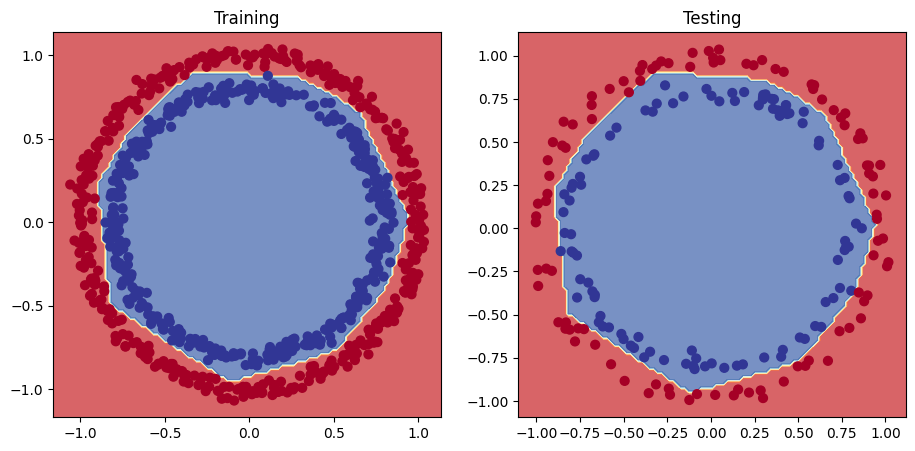

In [729]:
plt.figure(figsize=(11,5)) # width, height
plt.subplot(1,2,1)
plt.title("Training")
plot_decision_boundary(model_0, x_train, y_train)

plt.subplot(1, 2, 2)
plt.title("Testing")
plot_decision_boundary(model_0, x_test, y_test)

# Making Predictions

In [730]:
next(model_0.parameters()).device

device(type='cpu')

In [731]:
model_0 = model_0.to(device)

In [732]:
model_0.eval()
with torch.inference_mode():
  y_pred = torch.round(torch.sigmoid(model_0(x_test))).squeeze()
y_pred[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))